In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv('data/train.csv')

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Auto-detect display width
pd.set_option('display.max_colwidth', None) # Show full content of each cell

training_data = data.drop(columns=['SalePrice'])
target = data['SalePrice']

In [19]:
# Encode text data and normalise values
from sklearn.preprocessing import LabelEncoder

df_encoded = training_data.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object'):
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le
# Normalise data   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

training_data = df_encoded.dropna()
print(training_data.head())

         Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  \
0 -1.730865    0.073375 -0.045532    -0.208034 -0.207142  0.064238  0.244717   
1 -1.728492   -0.872563 -0.045532     0.409895 -0.091886  0.064238  0.244717   
2 -1.726120    0.073375 -0.045532    -0.084449  0.073480  0.064238  0.244717   
3 -1.723747    0.309859 -0.045532    -0.414011 -0.096897  0.064238  0.244717   
4 -1.721374    0.073375 -0.045532     0.574676  0.375148  0.064238  0.244717   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.750731     0.314667   -0.02618   0.604670  -0.225716     -1.206215   
1  0.750731     0.314667   -0.02618  -0.628316  -0.225716      1.954302   
2 -1.378933     0.314667   -0.02618   0.604670  -0.225716     -1.206215   
3 -1.378933     0.314667   -0.02618  -1.861302  -0.225716     -1.039872   
4 -1.378933     0.314667   -0.02618  -0.628316  -0.225716      0.457215   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  Overal

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 40917942272.0000 - mae: 183329.8281 - val_loss: 35740786688.0000 - val_mae: 174194.2969
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39321051136.0000 - mae: 182275.4062 - val_loss: 35717500928.0000 - val_mae: 174126.7031
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38753701888.0000 - mae: 180856.3750 - val_loss: 35622686720.0000 - val_mae: 173850.5625
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41428144128.0000 - mae: 184246.8906 - val_loss: 35332132864.0000 - val_mae: 173001.2500
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38611021824.0000 - mae: 179222.0625 - val_loss: 34631565312.0000 - val_mae: 170930.2969
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35242078208.0000 - mae: 171943.4844 - val_loss: 33241376768.0000 - val_mae: 166705.2656
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36705742848.0000 - mae: 172435.8906 - val_loss: 30896490496

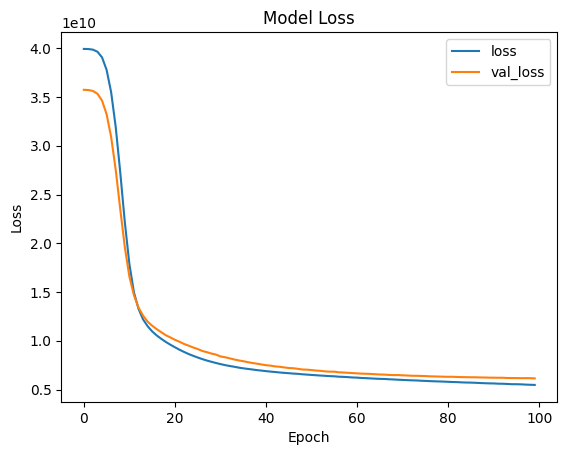

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(training_data.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1) 
    ])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(training_data, target, epochs=100, batch_size=32, validation_split=0.2)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
# Save the model
model.save('models/house_price_model.h5')